<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">Airplane Passengers Count - Time Series Forecasting</div>

![](https://images.unsplash.com/photo-1561101904-da649fcbf03f?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=987&q=80)

<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">Imports</div>

In [1]:
%%html
<style>
    .jp-CodeCell {
        background-color: orange;
    }
</style>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime

# Data Loading
---

In [3]:
data=pd.read_csv(r'/kaggle/input/air-passengers/AirPassengers.csv')

In [4]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [6]:
data.shape

(144, 2)

<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">EDA & Data Cleaning</div>

In [7]:
data['Month']=pd.to_datetime(data['Month'], infer_datetime_format=True)
data=data.set_index(['Month'])

In [8]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


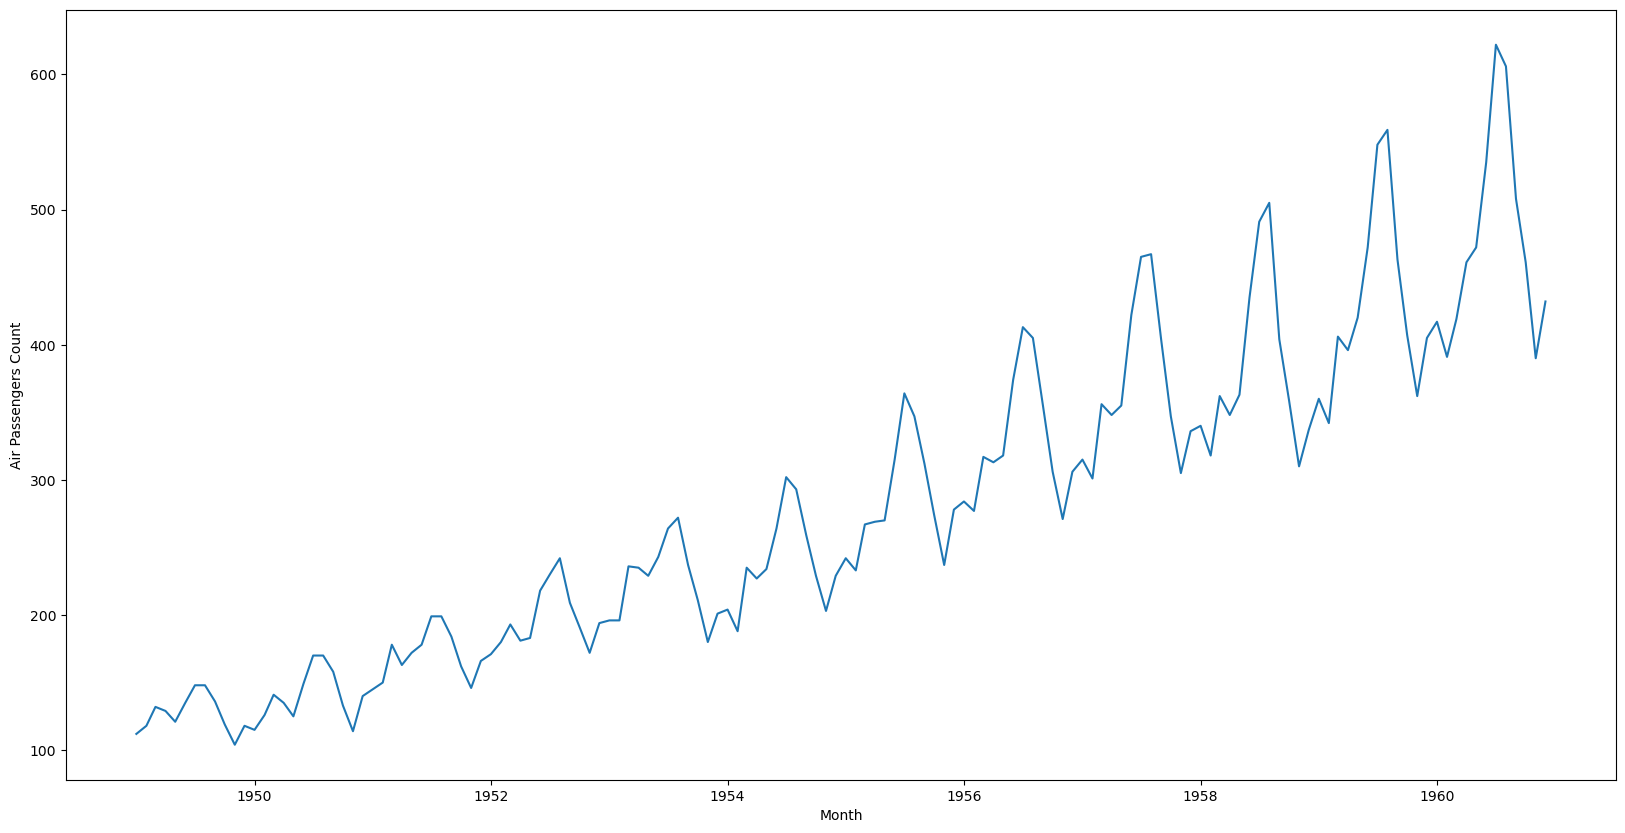

In [9]:
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Air Passengers Count")
plt.plot(data)

<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">Calculating the Trend</div>

In [10]:
# Calculate the trend
trend = data['#Passengers'].rolling(window=12).mean()

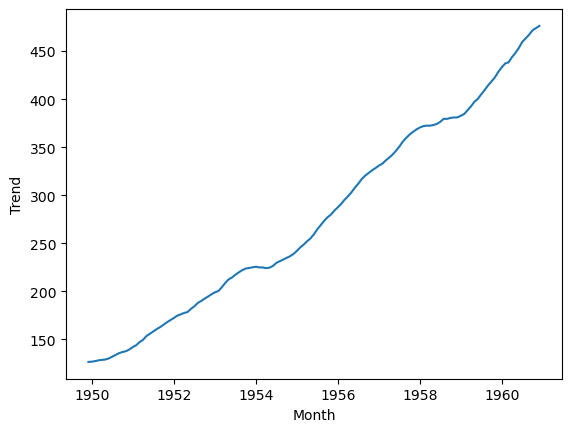

In [11]:
# Plot the trend
plt.plot(trend)
plt.xlabel('Month')
plt.ylabel('Trend')
plt.show()

<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">Calculating the Seasonality</div>

In [12]:
# Calculate the seasonality
seasonality = data['#Passengers'] - trend

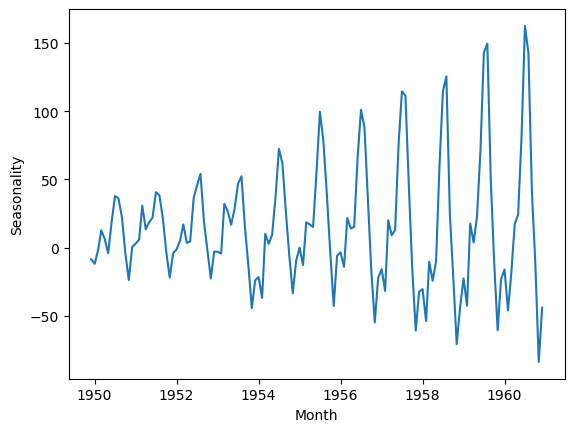

In [13]:
# Plot the seasonality
plt.plot(seasonality)
plt.xlabel('Month')
plt.ylabel('Seasonality')
plt.show()

<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">Determining Rolling Statistics</div>

In [14]:
# Determining rolling statistics
rolmean = data.rolling(window=12).mean()
rolstd = data.rolling(window=12).std()

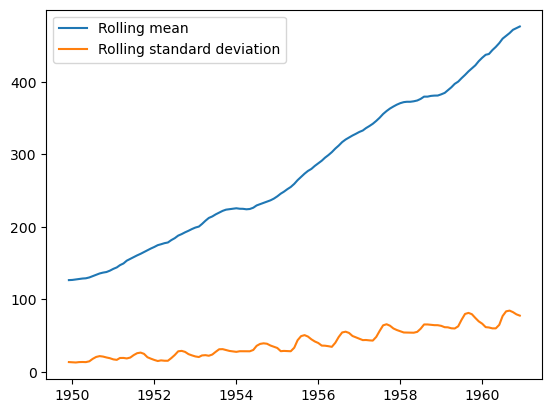

In [15]:
# Plot the rolling statistics
plt.plot(rolmean, label='Rolling mean')
plt.plot(rolstd, label='Rolling standard deviation')
plt.legend()
plt.show()

<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">Calculating ACF & PCF</div>

In [16]:
import statsmodels.tsa.stattools as stattools

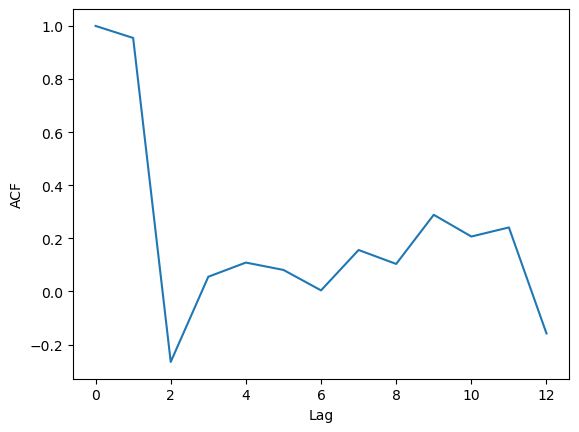

In [17]:
# Calculate the ACF
acf = stattools.pacf(data['#Passengers'], nlags=12)

# Plot the ACF
plt.plot(acf)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

In [18]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf

/opt/conda/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


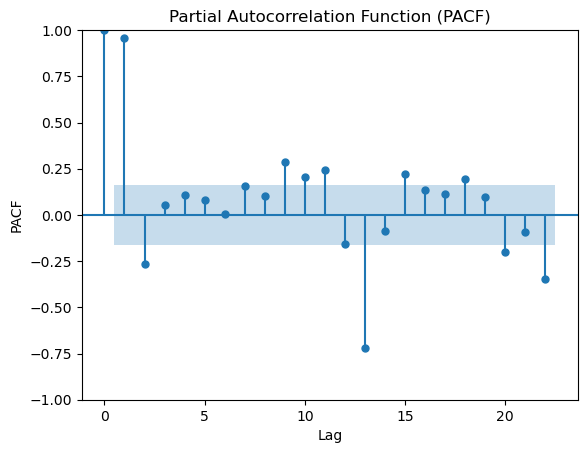

In [19]:
# Calculate the PACF
plot_pacf(data['#Passengers'])
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">Time Series Forecasting</div>

In [20]:
# Fit the model
model = ARIMA(data['#Passengers'], order=(20, 2, 4))
model_fit = model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

In [21]:
# Make predictions
start_date = data.index[-1] + pd.DateOffset(months=1)
end_date = data.index[-1] + pd.DateOffset(months=13)
predictions = model_fit.predict(start=start_date, end=end_date)

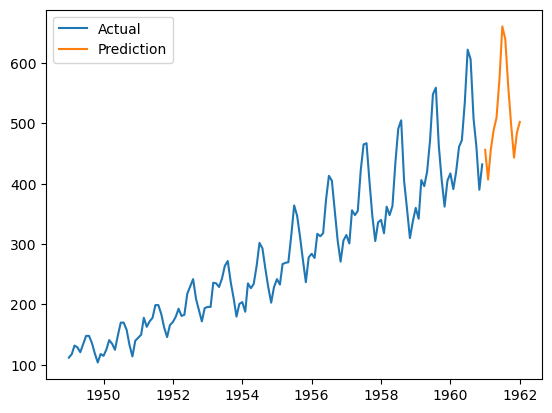

In [22]:
# Plot the predictions
plt.plot(data['#Passengers'], label='Actual')
plt.plot(predictions, label='Prediction')
plt.legend()
plt.show()

<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">Thank You - Do Upvote if the Notebook was Helpful!</div>

![](https://i.gifer.com/5qR.gif)

----